In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [5]:
dfe = df.copy()

dfe['sex'] = enc.fit_transform(df['sex'])
dfe['smoker'] = enc.fit_transform(df['smoker'])
dfe['region'] = enc.fit_transform(df['region'])

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfe.drop('charges', axis=1), dfe['charges'],\
                                                    test_size=0.2, random_state=42)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import ELU

In [8]:
from tensorflow.keras.backend import sqrt as Ksqrt
from tensorflow.keras.backend import mean as Kmean
from tensorflow.keras.backend import square as Ksquare

In [9]:
def root_mean_squared_error(y_true, y_pred):
        return Ksqrt(Kmean(Ksquare(y_pred - y_true))) 

In [10]:
def check_min_max(y_pred):
    print("Predicted values\n\nmax: {}\nmin: {}".format(np.max(y_pred), np.min(y_pred)))
    print("\nActual values\n\nmax: {}\nmin: {}".format(np.max(y_test), np.min(y_test)))

In [11]:
def epoc_plots(hist):
    fig, axs = plt.subplots(3, 1, figsize=(15,18))
    #1st plot
    axs[0].plot(hist.history['loss'], label='loss')
    axs[0].plot(hist.history['val_loss'], label='val_loss')
    axs[0].set_xlabel('Epocs', fontsize=12)
    axs[0].set_ylabel('Root Mean Squared Error (loss)', fontsize=12)
    axs[0].legend(loc='upper right', fontsize=12)

    #2nd plot 
    axs[1].plot(hist.history['mae'], label='mae')
    axs[1].plot(hist.history['val_mae'], label='val_mae')
    axs[1].set_xlabel('Epocs', fontsize=12)
    axs[1].set_ylabel('Mean Absolute Error', fontsize=12)
    axs[1].legend(loc='upper right', fontsize=12)

    #3rd plot 
    axs[2].plot(hist.history['mse'], label='mse')
    axs[2].plot(hist.history['val_mse'], label='val_mse')
    axs[2].set_xlabel('Epocs', fontsize=12)
    axs[2].set_ylabel('Mean Squared Error', fontsize=12)
    axs[2].legend(loc='upper right', fontsize=12)

    plt.tight_layout()

In [12]:
def regression_plots(y_pred, model):
    fig, axs = plt.subplots(2, 1, figsize=(15,12))
    #1st plot
    sns.scatterplot(model.predict(X_train).reshape(-1), y_train, ax=axs[0])
    axs[0].set_xlabel('Predicted Values', fontsize=12)
    axs[0].set_ylabel('Actual Values', fontsize=12)
    sns.lineplot(model.predict(X_train).reshape(-1), model.predict(X_train).reshape(-1), color='red', ax=axs[0])
    axs[0].set_title('Predictions for train data', fontsize=15)

    #2nd plot 
    sns.scatterplot(y_pred.reshape(-1), y_test, ax=axs[1])
    axs[1].set_xlabel('Predicted Values', fontsize=12)
    axs[1].set_ylabel('Actual Values', fontsize=12)
    sns.lineplot(y_pred.reshape(-1), y_pred.reshape(-1), color='red', ax=axs[1])
    axs[1].set_title('Predictions for test data', fontsize=15)

    plt.tight_layout()

In [15]:
# (one of) the reason for the need for weight init, and a different activation function
# was to avoid the issue of avoiding very low or very high values during the back prop 
# but a relatively simpler solution to this problem is to just normalize the values 
# and this method is known as Batch Normalization
# lets try that out now

In [58]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout

In [22]:
# # param count: 14,311
# model54 = Sequential() 

# model54.add(Dense(30, input_dim=6, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
# model54.add(Dense(30, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
# model54.add(Dense(30, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
# for _ in range(50):
#     model54.add(Dense(15, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
# model54.add(Dense(1, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))

# model54.compile(loss=root_mean_squared_error, optimizer=Adam(0.001),
#              metrics=['mse', 'mae'])

In [75]:
# param count: 15,601 (17,261)
model55 = Sequential() 

model55.add(Dense(20, input_dim=6))
model55.add(Activation(ELU()))
model55.add(BatchNormalization())
# model55.add(Dropout(0.5))

model55.add(Dense(30))
model55.add(Activation(ELU()))
model55.add(BatchNormalization())

model55.add(Dense(30))
model55.add(Activation(ELU()))
model55.add(BatchNormalization())

for _ in range(50):
    model55.add(Dense(15))
    model55.add(Activation(ELU()))
    model55.add(BatchNormalization())
#     model55.add(Dropout(0.5))

model55.add(Dense(1, activation='relu', bias_initializer='zeros'))

model55.compile(loss=root_mean_squared_error, optimizer=Adam(0.005),
             metrics=['mse', 'mae'])

In [76]:
model55.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_550 (Dense)            (None, 20)                140       
_________________________________________________________________
activation_535 (Activation)  (None, 20)                0         
_________________________________________________________________
batch_normalization_537 (Bat (None, 20)                80        
_________________________________________________________________
dense_551 (Dense)            (None, 30)                630       
_________________________________________________________________
activation_536 (Activation)  (None, 30)                0         
_________________________________________________________________
batch_normalization_538 (Bat (None, 30)                120       
_________________________________________________________________
dense_552 (Dense)            (None, 30)              

In [77]:
history55 = model55.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 12s 825ms/step - loss: 18015.5156 - mse: 325423648.0000 - mae: 13517.1201 - val_loss: 17593.4688 - val_mse: 310368800.0000 - val_mae: 12655.5781
Epoch 2/300
14/14 [==============================] - 2s 110ms/step - loss: 17934.2773 - mse: 325364928.0000 - mae: 13515.2188 - val_loss: 17592.8867 - val_mse: 310348672.0000 - val_mae: 12654.0195
Epoch 3/300
14/14 [==============================] - 1s 87ms/step - loss: 17911.7129 - mse: 325327584.0000 - mae: 13513.7490 - val_loss: 17581.3906 - val_mse: 309943808.0000 - val_mae: 12638.7383
Epoch 4/300
14/14 [==============================] - 1s 96ms/step - loss: 17906.1582 - mse: 325290688.0000 - mae: 13512.3340 - val_loss: 17575.8066 - val_mse: 309746624.0000 - val_mae: 12630.9590
Epoch 5/300
14/14 [==============================] - 1s 89ms/step - loss: 17917.2891 - mse: 325216672.0000 - mae: 13510.3965 - val_loss: 17577.1621 - val_mse: 309793920.0000 - val_mae: 12635.5537
Epoch 6/300
14/14

14/14 [==============================] - 1s 45ms/step - loss: 17682.0078 - mse: 314545440.0000 - mae: 13134.5166 - val_loss: 17551.5801 - val_mse: 308894624.0000 - val_mae: 12580.8018
Epoch 43/300
14/14 [==============================] - 1s 39ms/step - loss: 17623.0332 - mse: 314612128.0000 - mae: 13123.1357 - val_loss: 17212.0996 - val_mse: 297097152.0000 - val_mae: 12123.1260
Epoch 44/300
14/14 [==============================] - 1s 46ms/step - loss: 17514.1367 - mse: 313557472.0000 - mae: 13100.7686 - val_loss: 17177.1699 - val_mse: 295885952.0000 - val_mae: 12073.7363
Epoch 45/300
14/14 [==============================] - 1s 39ms/step - loss: 17603.4609 - mse: 313246496.0000 - mae: 13079.7910 - val_loss: 17332.8223 - val_mse: 301238496.0000 - val_mae: 12252.4043
Epoch 46/300
14/14 [==============================] - 1s 44ms/step - loss: 17572.1035 - mse: 312626368.0000 - mae: 13056.6963 - val_loss: 17282.2656 - val_mse: 299528960.0000 - val_mae: 12222.1748
Epoch 47/300
14/14 [========

Epoch 84/300
14/14 [==============================] - 1s 58ms/step - loss: 16770.3242 - mse: 285194656.0000 - mae: 12055.4180 - val_loss: 16764.4922 - val_mse: 281798784.0000 - val_mae: 11767.2627
Epoch 85/300
14/14 [==============================] - 1s 39ms/step - loss: 16809.9238 - mse: 286081376.0000 - mae: 12043.3057 - val_loss: 15987.5303 - val_mse: 256387856.0000 - val_mae: 10456.9600
Epoch 86/300
14/14 [==============================] - 1s 39ms/step - loss: 16689.8730 - mse: 284017504.0000 - mae: 11992.9873 - val_loss: 15886.2617 - val_mse: 253212592.0000 - val_mae: 10311.8818
Epoch 87/300
14/14 [==============================] - 1s 38ms/step - loss: 16741.9180 - mse: 282474272.0000 - mae: 11962.1777 - val_loss: 16342.1943 - val_mse: 267691168.0000 - val_mae: 11262.4629
Epoch 88/300
14/14 [==============================] - 1s 39ms/step - loss: 16664.0723 - mse: 280805088.0000 - mae: 11970.8818 - val_loss: 15883.8867 - val_mse: 253093088.0000 - val_mae: 10328.4209
Epoch 89/300
14

14/14 [==============================] - 5s 341ms/step - loss: 15685.7031 - mse: 247656800.0000 - mae: 10644.0771 - val_loss: 17594.4297 - val_mse: 310400096.0000 - val_mae: 12662.0381
Epoch 126/300
14/14 [==============================] - 5s 369ms/step - loss: 15544.0635 - mse: 244886176.0000 - mae: 10572.1943 - val_loss: 17558.0801 - val_mse: 309078048.0000 - val_mae: 12605.8213
Epoch 127/300
14/14 [==============================] - 5s 348ms/step - loss: 15531.2002 - mse: 242564272.0000 - mae: 10479.6289 - val_loss: 17558.5195 - val_mse: 309065056.0000 - val_mae: 12681.3506
Epoch 128/300
14/14 [==============================] - 5s 367ms/step - loss: 15422.4072 - mse: 241790608.0000 - mae: 10449.8652 - val_loss: 14247.7598 - val_mse: 203821520.0000 - val_mae: 8699.2715
Epoch 129/300
14/14 [==============================] - 5s 361ms/step - loss: 15391.4102 - mse: 240999488.0000 - mae: 10394.2930 - val_loss: 14315.2754 - val_mse: 205721232.0000 - val_mae: 8784.7891
Epoch 130/300
14/14 [

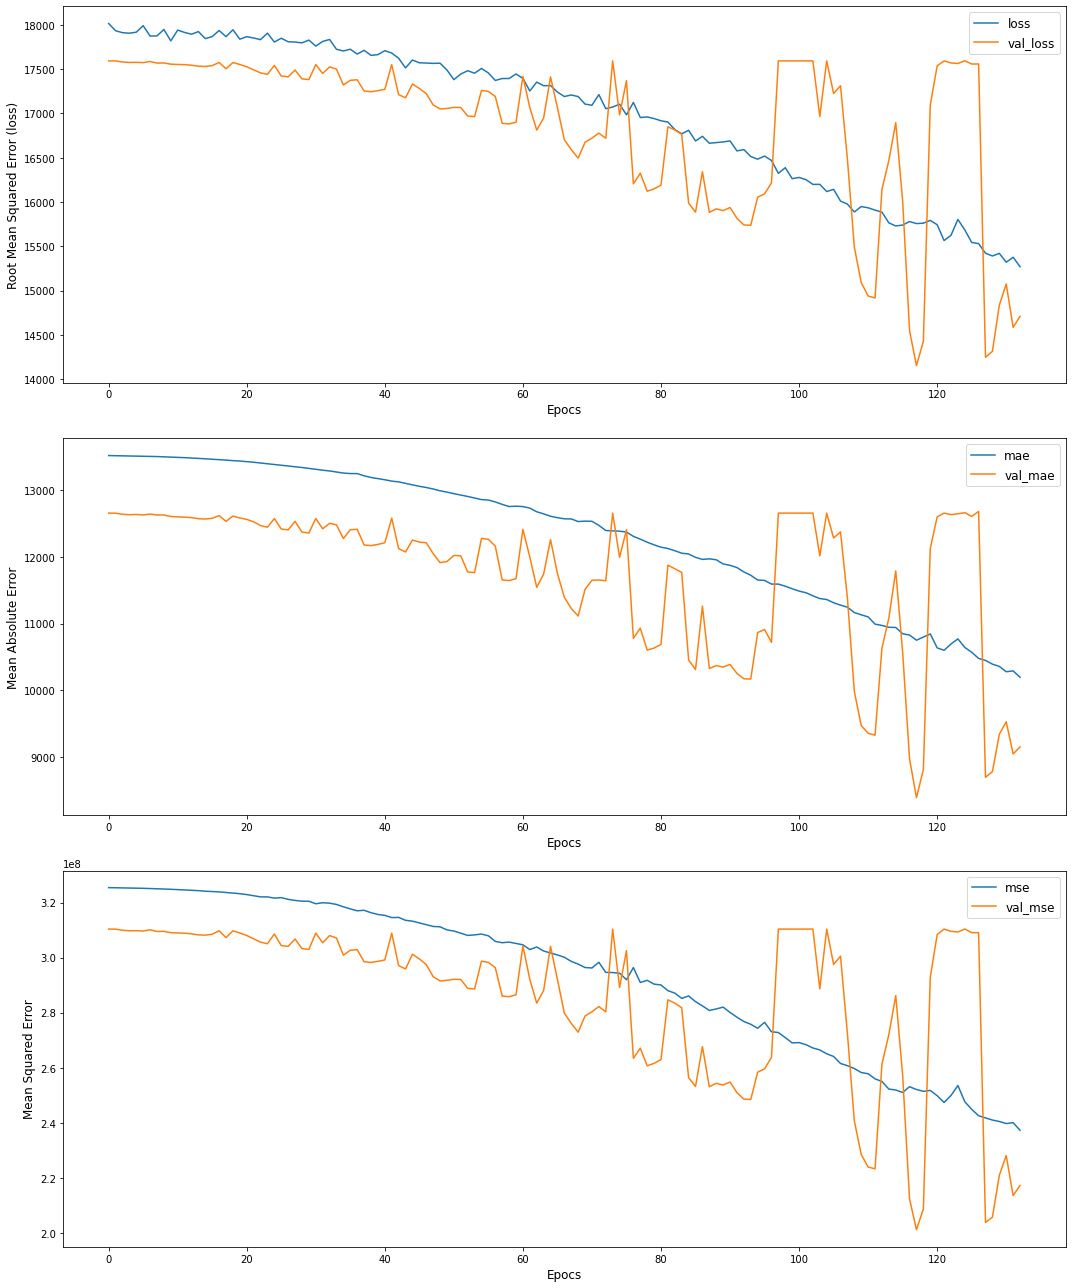

In [78]:
epoc_plots(history55)

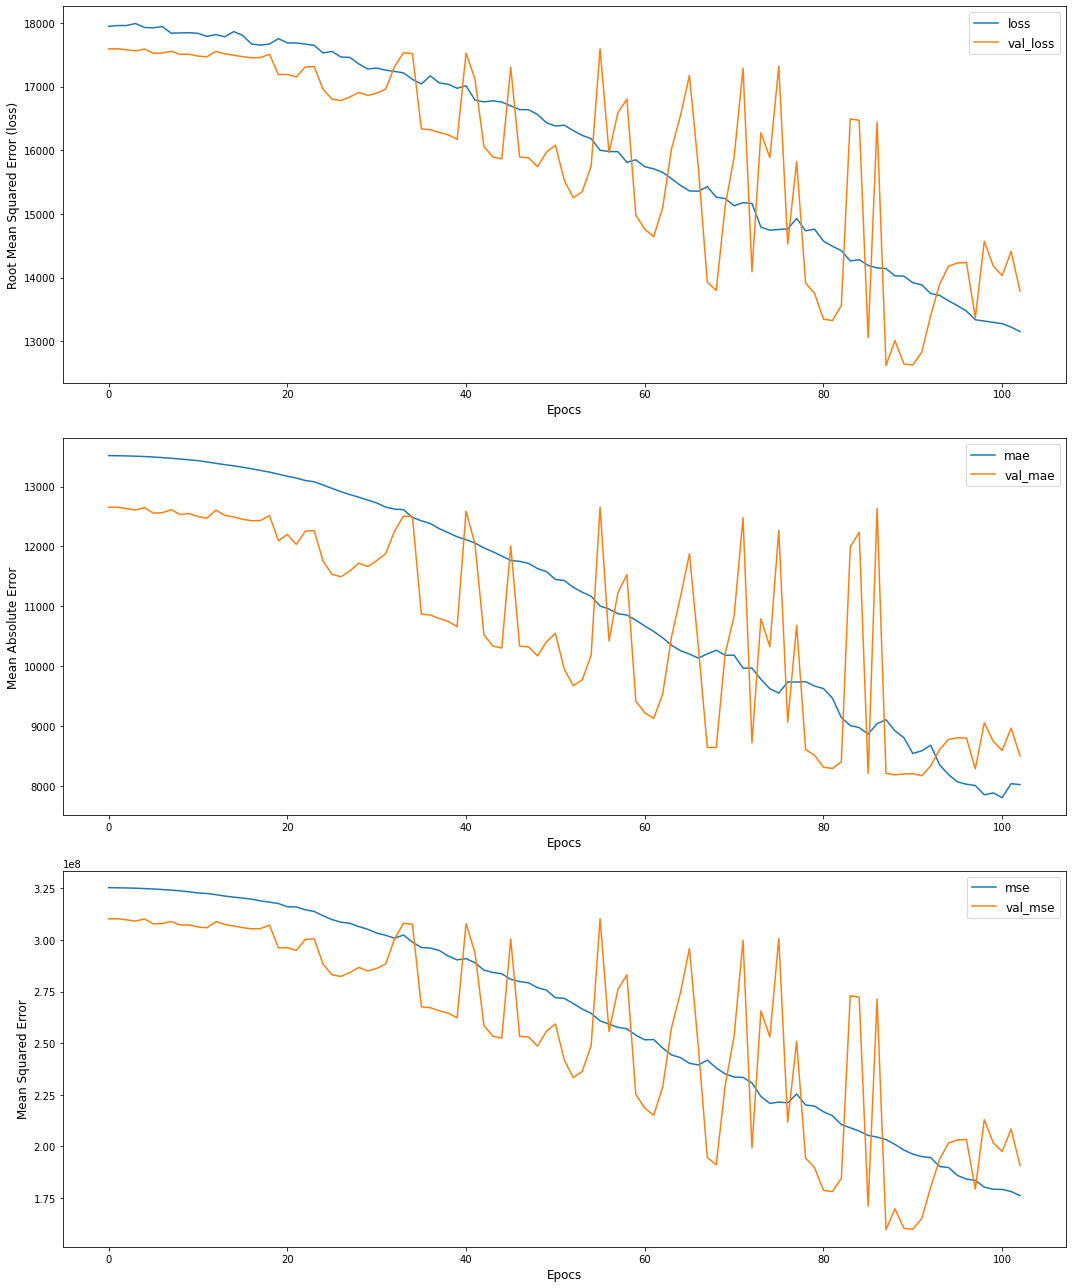

In [73]:
epoc_plots(history55)

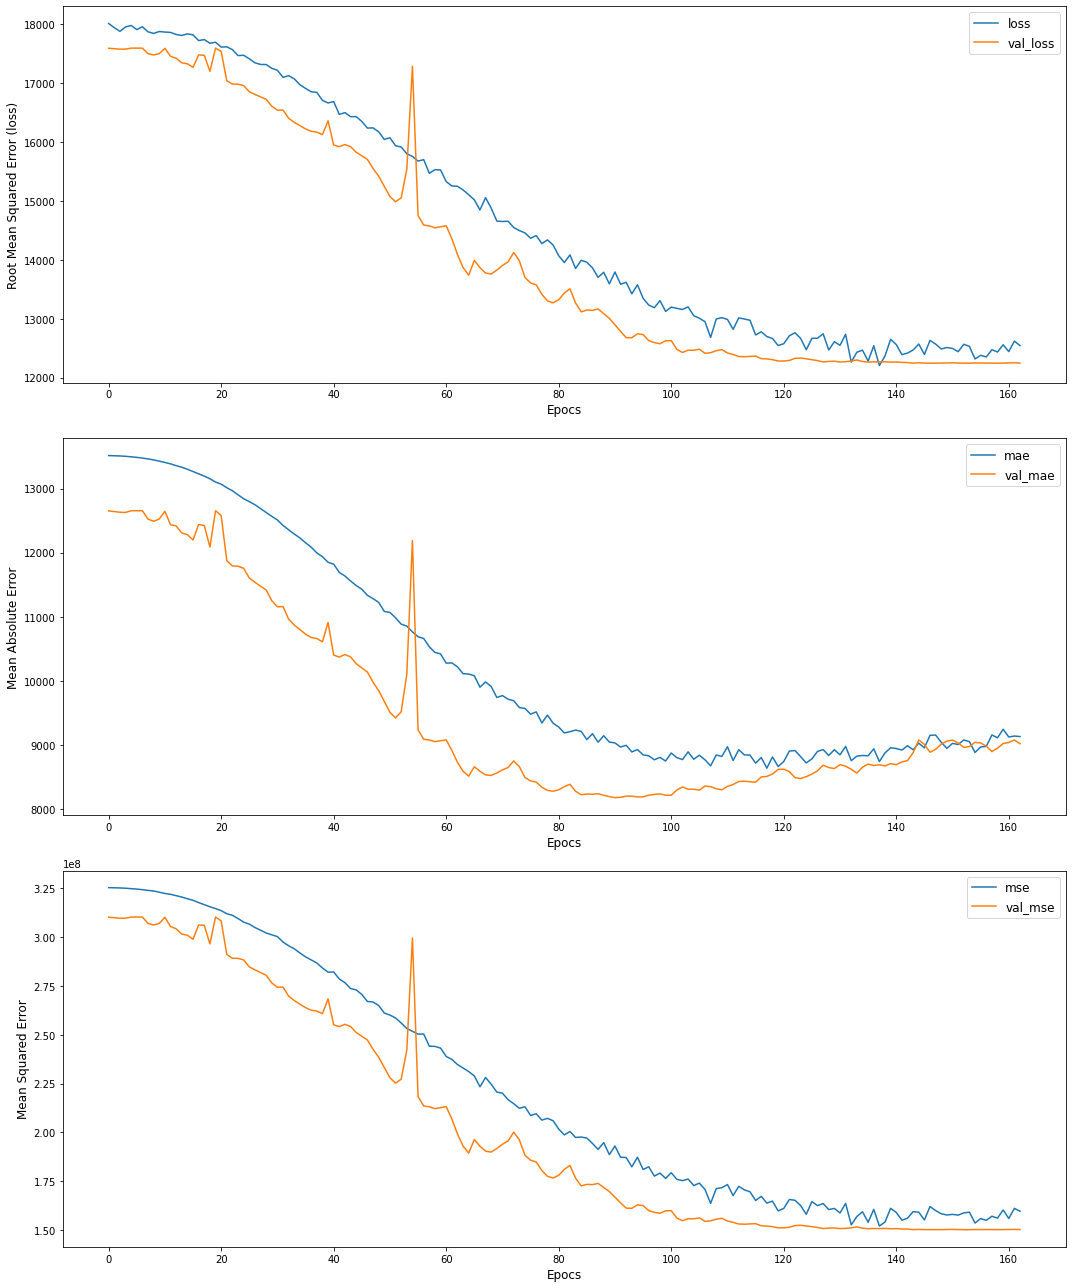

In [68]:
epoc_plots(history55)

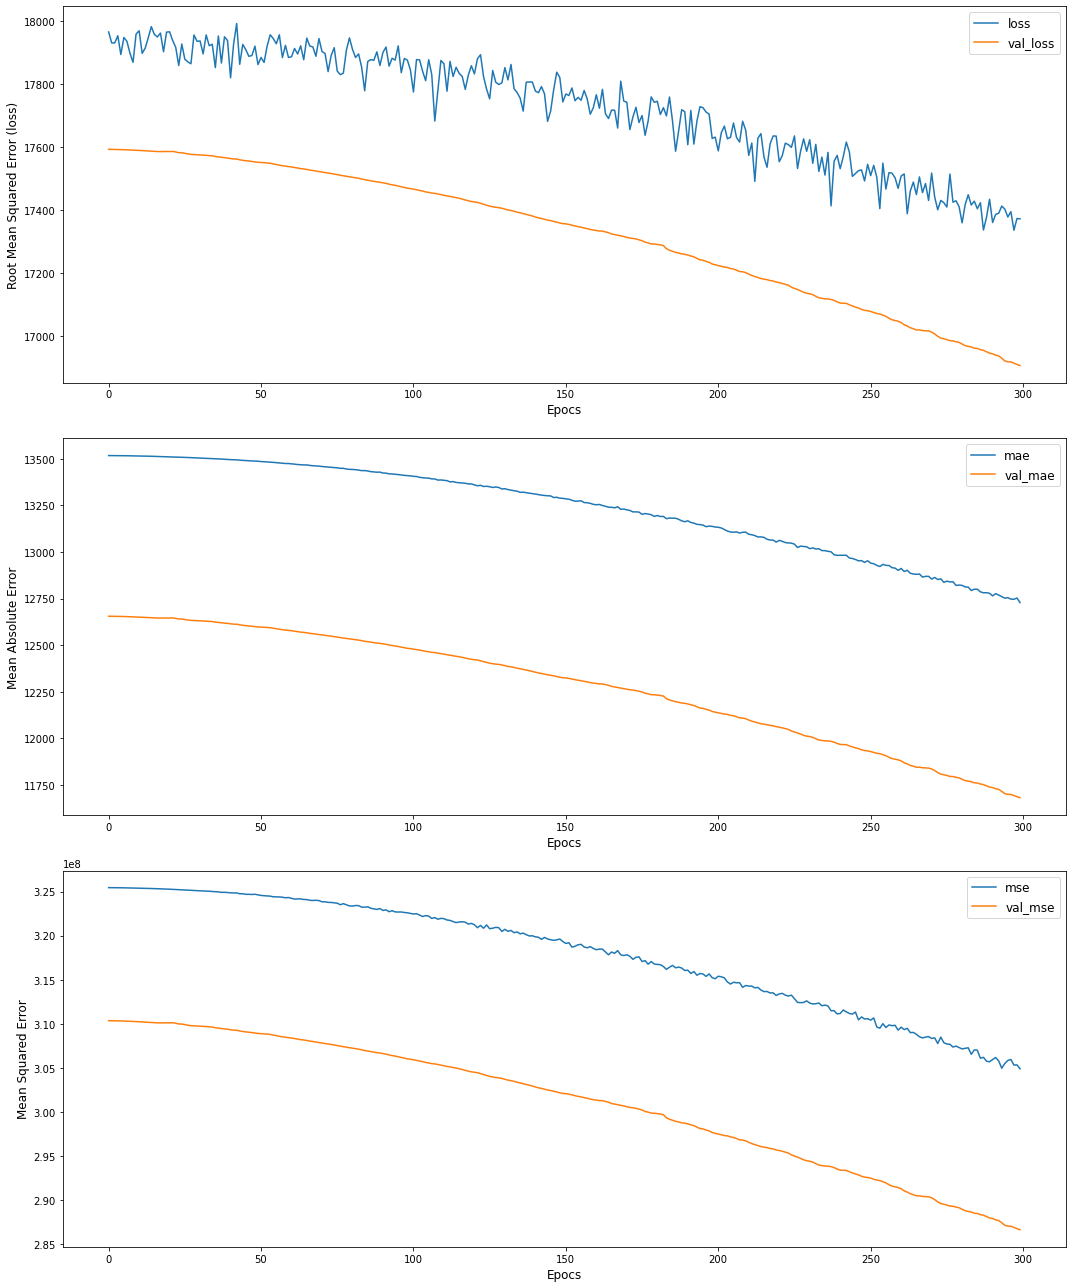

In [62]:
epoc_plots(history55)

In [79]:
y_pred55 = model55.predict(X_test)
r2_score(y_test, y_pred55) 

-0.4800318117956124